In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import acquire as a

# SF Weather

In [44]:
df = data.sf_temps()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [46]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [47]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

In [48]:
daily_avg_temp = df.resample('D').mean()
daily_avg_temp.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

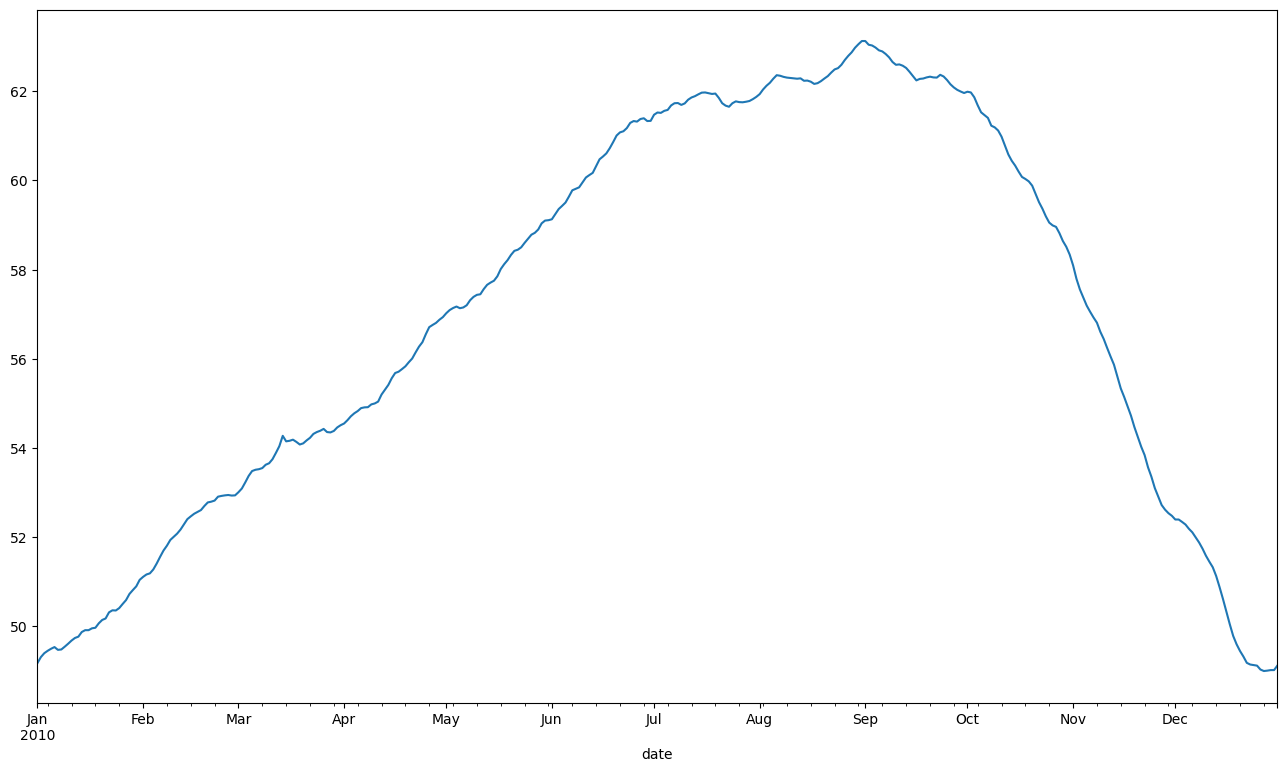

In [49]:
daily_avg_temp.temp.plot()

### Write the code necessary to visualize the minimum temperature over time.

In [64]:
daily_min_temp = df.resample('D').min()
daily_min_temp.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

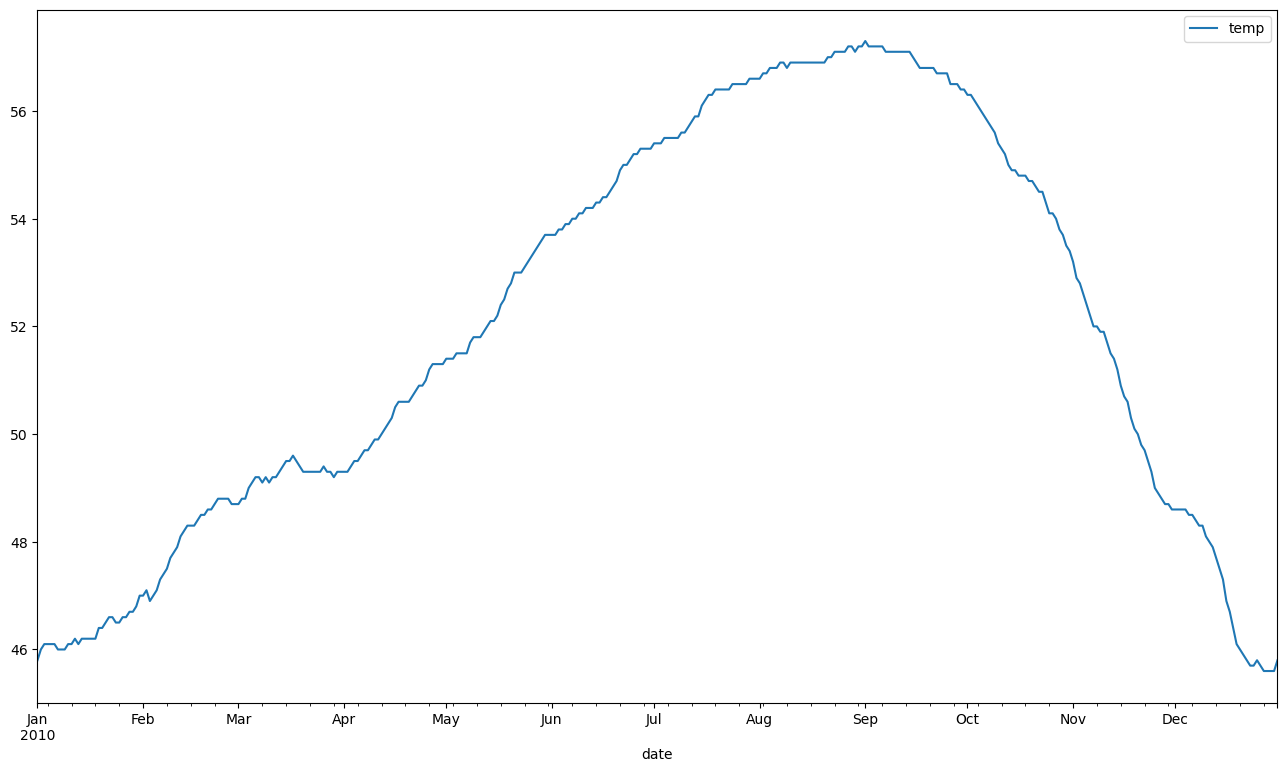

In [65]:
daily_min_temp.plot()

### Write the code necessary to visualize the maximum temperature over time.

In [66]:
daily_max_temp = df.resample('D').max()
daily_max_temp.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

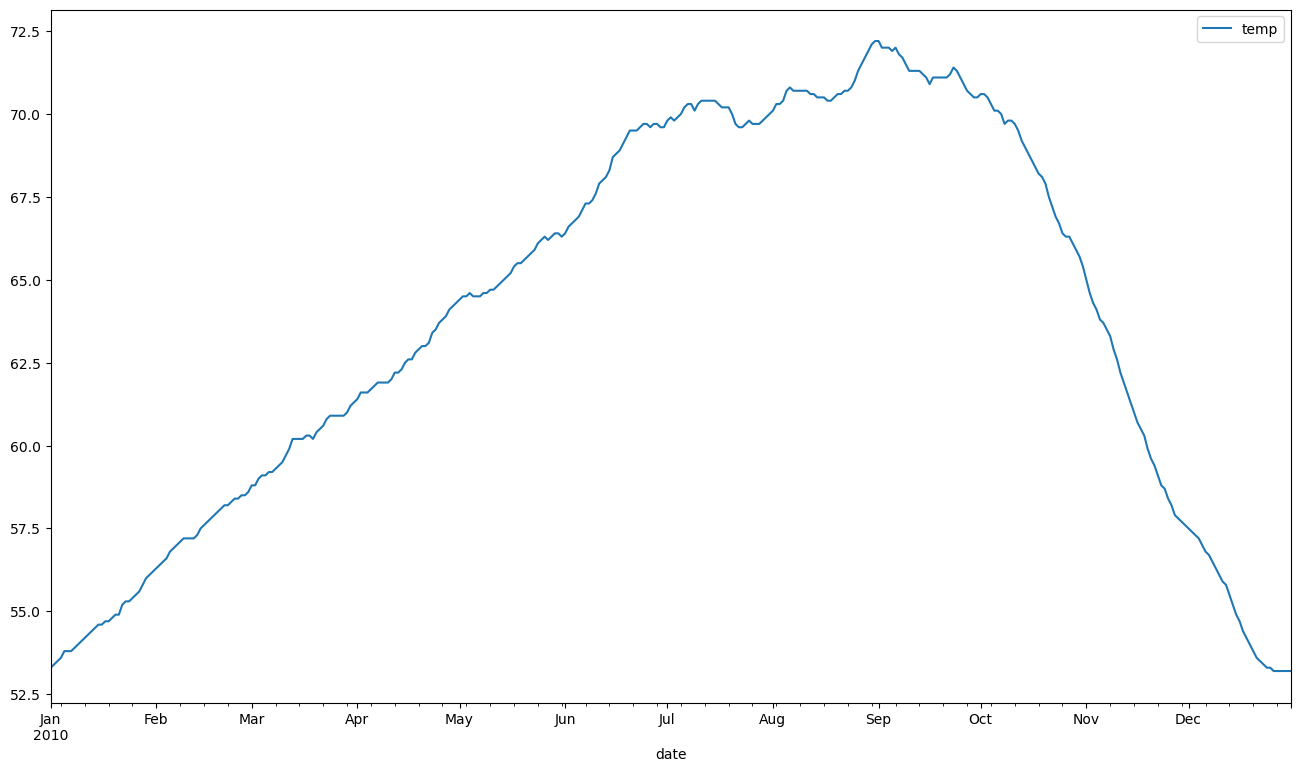

In [63]:
daily_max_temp.plot()

### Which month is the coldest, on average?

In [68]:
monthly_avg_temp = df.resample('M').mean()
monthly_avg_temp

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [75]:
monthly_avg_temp.min()

temp    49.98414
dtype: float64

In [79]:
coldest_month = monthly_avg_temp.sort_values(by='temp').index[0].month_name()
coldest_month

'January'

### Which month has the highest average temperature?

In [80]:
monthly_avg_temp.max()

temp    62.487083
dtype: float64

In [81]:
warmest_month = monthly_avg_temp.sort_values(by='temp', ascending=False).index[0].month_name()
warmest_month

'September'

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [83]:
daily_min_max_temp = df.resample('D').agg(['min', 'max'])
daily_min_max_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [94]:
delta = daily_min_max_temp.temp['max'] - daily_min_max_temp.temp['min']

In [95]:
daily_min_max_temp['delta'] = delta

In [97]:
monthly_temps = daily_min_max_temp.resample('M').mean()

In [98]:
monthly_temps.head()

temp                 delta
                  min        max           
date                                       
2010-01-31  46.309677  54.651613   8.341935
2010-02-28  48.064286  57.550000   9.485714
2010-03-31  49.238710  60.093548  10.854839
2010-04-30  50.326667  62.646667  12.320000
2010-05-31  52.403226  65.312903  12.909677

In [99]:
largest_temp_delta_month = monthly_temps.sort_values(by='delta', ascending=False).index[0].month_name()
largest_temp_delta_month

'September'

In [100]:
monthly_temps.sort_values(by='delta', ascending=False)

temp                 delta
                  min        max           
date                                       
2010-09-30  56.903333  71.306667  14.403333
2010-07-31  56.045161  70.022581  13.977419
2010-06-30  54.480000  68.430000  13.950000
2010-08-31  56.941935  70.812903  13.870968
2010-10-31  54.932258  68.364516  13.432258
2010-05-31  52.403226  65.312903  12.909677
2010-04-30  50.326667  62.646667  12.320000
2010-03-31  49.238710  60.093548  10.854839
2010-11-30  50.776667  61.013333  10.236667
2010-02-28  48.064286  57.550000   9.485714
2010-01-31  46.309677  54.651613   8.341935
2010-12-31  47.025806  54.951613   7.925806

# Seattle Weather

In [101]:
df = data.seattle_weather()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [103]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### Which year and month combination has the highest amount of precipitation?

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

In [109]:
monthly_rain = df.precipitation.resample('M').sum()

In [115]:
monthly_rain_df = pd.DataFrame(monthly_rain)
monthly_rain_df.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [120]:
most_rain = monthly_rain_df.sort_values(by='precipitation', ascending=False).index[0].strftime('%B %Y')
most_rain

'December 2015'

### Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

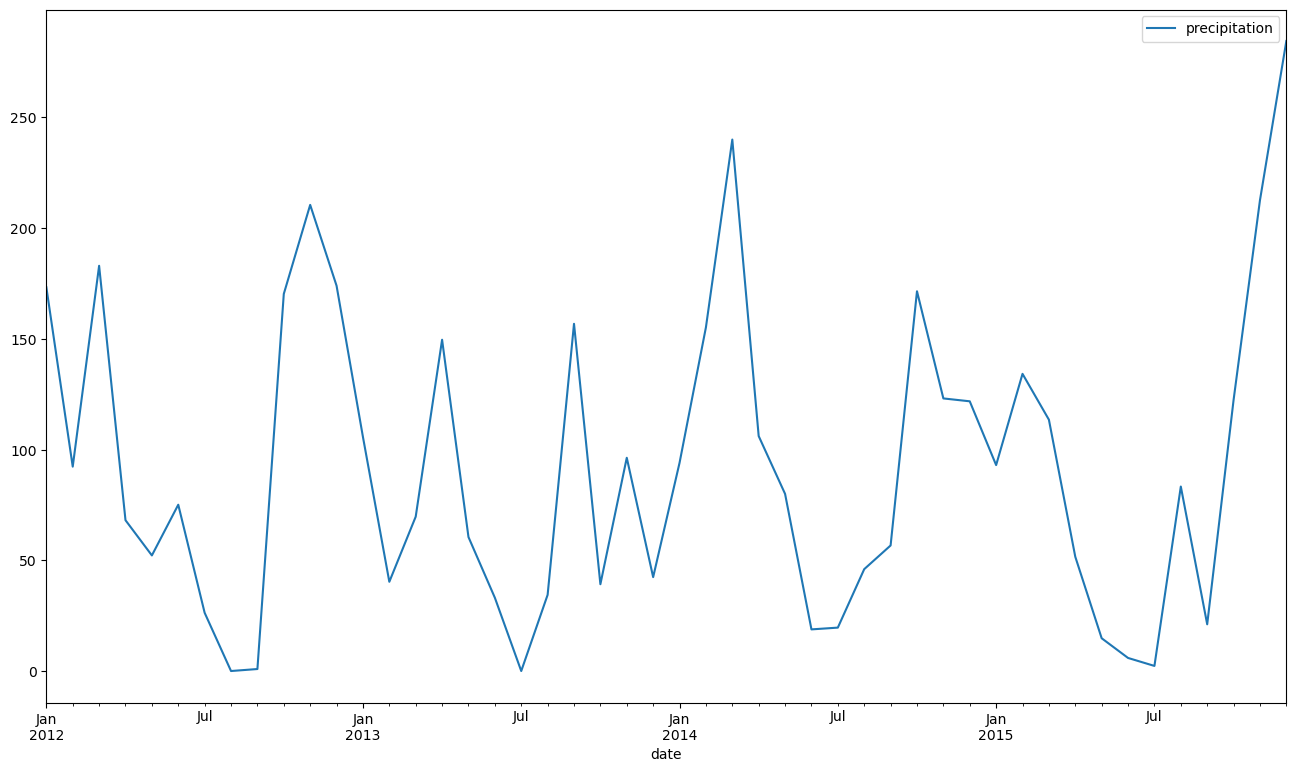

In [121]:
monthly_rain_df.plot()

### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [122]:
weekly_wind = df.wind.resample('W').mean()

In [123]:
weekly_wind_df = pd.DataFrame(weekly_wind)
weekly_wind_df.head()

,wind
date,
2012-01-01,4.700000
2012-01-08,3.442857
2012-01-15,3.371429
2012-01-22,4.642857
2012-01-29,3.857143


<AxesSubplot:xlabel='date'>

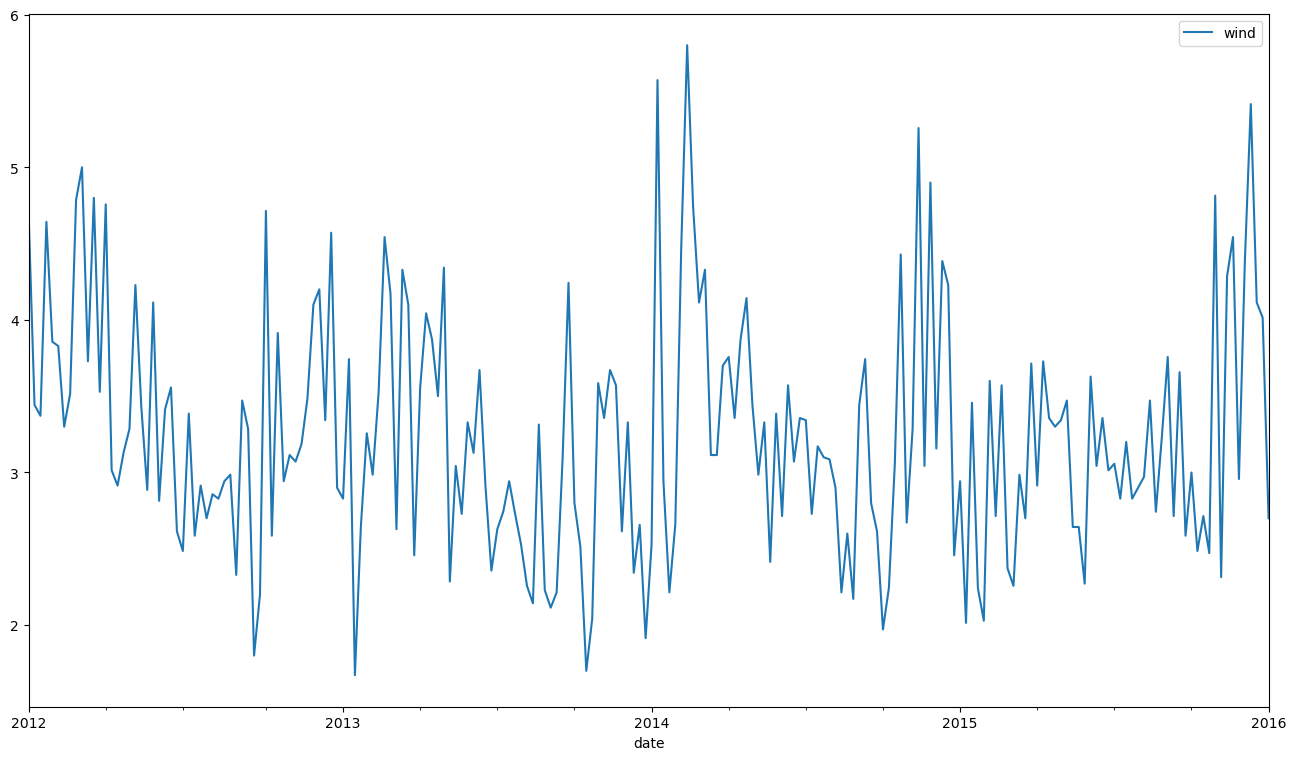

In [124]:
weekly_wind_df.plot()

### Which year-month combination is the windiest?

In [126]:
monthly_wind = df.wind.resample('M').mean()

In [127]:
monthly_wind_df = pd.DataFrame(monthly_wind)
monthly_wind_df.head()

,wind
date,
2012-01-31,3.900000
2012-02-29,3.903448
2012-03-31,4.248387
2012-04-30,3.373333
2012-05-31,3.354839


In [128]:
most_wind = monthly_wind_df.sort_values(by='wind', ascending=False).index[0].strftime('%B %Y')
most_wind

'February 2014'

### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [129]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [131]:
mask = df.weather == 'sun'

In [133]:
df['sun'] = mask

In [134]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,sun
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [140]:
sunny_days_per_year = df.sun.resample('Y').sum()
sunny_days_per_year

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: sun, dtype: int64

In [141]:
sunny_days_per_year_df = pd.DataFrame(sunny_days_per_year)
sunny_days_per_year_df.head()

,sun
date,
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


In [142]:
most_sunny_year = sunny_days_per_year_df.sort_values(by='sun', ascending=False).index[0].strftime('%Y')
most_sunny_year

'2014'

### In which month does it rain the most?

In [145]:
monthly_rain = df.precipitation.resample('M').sum()

In [156]:
monthly_rain_df = pd.DataFrame(monthly_rain)
monthly_rain_df.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [172]:
monthly_rain_df['month'] = monthly_rain_df.index.month
monthly_rain_df.head()

,precipitation,month
date,,
2012-01-31,173.3,1
2012-02-29,92.3,2
2012-03-31,183.0,3
2012-04-30,68.1,4
2012-05-31,52.2,5


In [181]:
monthly_rain_df.groupby('month').sum().sort_values(by = 'precipitation', ascending=False).index[0]

11

NOVEMBER!

### Which month has the most number of days with a non-zero amount of precipitation?

In [183]:
daily_rain = df.precipitation.resample('D').sum()
daily_rain

date
2012-01-01     0.0
2012-01-02    10.9
2012-01-03     0.8
2012-01-04    20.3
2012-01-05     1.3
              ... 
2015-12-27     8.6
2015-12-28     1.5
2015-12-29     0.0
2015-12-30     0.0
2015-12-31     0.0
Freq: D, Name: precipitation, Length: 1461, dtype: float64

In [184]:
daily_rain_df = pd.DataFrame(daily_rain)
daily_rain_df.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


In [186]:
mask = daily_rain_df.precipitation == 0.0

In [187]:
daily_rain_df['zero_rain'] = mask

In [189]:
daily_rain_df.head()

,precipitation,zero_rain
date,,
2012-01-01,0.0,True
2012-01-02,10.9,False
2012-01-03,0.8,False
2012-01-04,20.3,False
2012-01-05,1.3,False


In [190]:
zero_rain_days = daily_rain_df.zero_rain.resample('B').sum()

In [192]:
zero_rain_days_df = pd.DataFrame(zero_rain_days)
zero_rain_days_df.head()

,zero_rain
date,
2011-12-30,1
2012-01-02,0
2012-01-03,0
2012-01-04,0
2012-01-05,0


In [193]:
zero_rain_days_df['month'] = zero_rain_days_df.index.month
zero_rain_days_df.head()

,zero_rain,month
date,,
2011-12-30,1,12
2012-01-02,0,1
2012-01-03,0,1
2012-01-04,0,1
2012-01-05,0,1


In [195]:
zero_rain_days_df.groupby('month').sum().sort_values(by = 'zero_rain', ascending=False).index[0]

7

JULY!

# Flights

In [246]:
df = data.flights_20k()

In [247]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

In [248]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Convert any negative delays to 0.

In [232]:
df['delay'] = df['delay'].clip(lower=0)

In [233]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Which hour of the day has the highest average delay?

In [234]:
hourly_delay = df.delay.resample('H').sum()

In [235]:
hourly_delay_df = pd.DataFrame(hourly_delay)
hourly_delay_df.head()

,delay
date,
2001-01-01 00:00:00,14
2001-01-01 01:00:00,0
2001-01-01 02:00:00,0
2001-01-01 03:00:00,0
2001-01-01 04:00:00,0


In [236]:
hourly_delay_df['hour'] = hourly_delay_df.index.hour
hourly_delay_df.head()

,delay,hour
date,,
2001-01-01 00:00:00,14,0
2001-01-01 01:00:00,0,1
2001-01-01 02:00:00,0,2
2001-01-01 03:00:00,0,3
2001-01-01 04:00:00,0,4


In [237]:
hourly_delay_df.groupby('hour').sum().sort_values(by = 'delay', ascending=False).index[0]

20

### Does the day of the week make a difference in the delay amount?

In [238]:
daily_delay = df.delay.resample('D').sum()
daily_delay

date
2001-01-01    1522
2001-01-02    4667
2001-01-03    4116
2001-01-04    1665
2001-01-05    2212
              ... 
2001-03-27    1032
2001-03-28     831
2001-03-29    2980
2001-03-30    2081
2001-03-31    1288
Freq: D, Name: delay, Length: 90, dtype: int64

In [239]:
daily_delay_df = pd.DataFrame(daily_delay)
daily_delay_df.head()

,delay
date,
2001-01-01,1522
2001-01-02,4667
2001-01-03,4116
2001-01-04,1665
2001-01-05,2212


In [241]:
daily_delay_df['weekday_number'] = daily_delay_df.index.weekday + 1
daily_delay_df.head()

,delay,weekday_number
date,,
2001-01-01,1522,1
2001-01-02,4667,2
2001-01-03,4116,3
2001-01-04,1665,4
2001-01-05,2212,5


In [242]:
daily_delay_df.groupby('weekday_number').sum().sort_values(by = 'delay', ascending=False)

,delay
weekday_number,
5,53770
4,38605
3,33969
2,27715
7,27221
1,21354
6,19755


Yes, there is a wide varience in delays depending on day of the week

### Does the month make a difference in the delay amount?

In [249]:
monthly_delay = df.delay.resample('M').sum()
monthly_delay

date
2001-01-31    55918
2001-02-28    58796
2001-03-31    47358
Freq: M, Name: delay, dtype: int64

In [253]:
df.index.min()

Timestamp('2001-01-01 00:01:00')

In [254]:
df.index.max()

Timestamp('2001-03-31 21:30:00')

This data set contains only 3 months, not enough data to conclude.